# Linear Regression

$$ H(x) = Wx + b $$

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

###  remark
torch.manual_seed()를 하는 이유: torch.manual_seed()를 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있음. torch.manual_seed()는 난수 발생 순서와 값을 동일하게 보장.


In [3]:
torch.manual_seed(3)
print('랜덤 시드가 3일 때')
for i in range(1,3):
  print(torch.rand(1))

torch.manual_seed(5)
print('랜덤 시드가 5일 때')
for i in range(1,3):
  print(torch.rand(1))

torch.manual_seed(3)
print('랜덤 시드가 다시 3일 때')
for i in range(1,3):
  print(torch.rand(1))

랜덤 시드가 3일 때
tensor([0.0043])
tensor([0.1056])
랜덤 시드가 5일 때
tensor([0.8303])
tensor([0.1261])
랜덤 시드가 다시 3일 때
tensor([0.0043])
tensor([0.1056])


## Data

In [11]:
x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[2], [4], [6.2], [7.9]])

In [12]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])


In [13]:
print(y_train)
print(y_train.shape)

tensor([[2.0000],
        [4.0000],
        [6.2000],
        [7.9000]])
torch.Size([4, 1])


## Weight Initialization

In [14]:
W = torch.zeros(1, requires_grad=True) # "requires_grad=True" 학습 할 것이라고 알려줍시다.
print(W)

tensor([0.], requires_grad=True)


In [15]:
b = torch.zeros(1, requires_grad=True) # "requires_grad=True" 학습 할 것이라고 알려줍시다.
print(b)

tensor([0.], requires_grad=True)


## Hypothesis

$$ H(x) = Wx + b $$

In [16]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## Cost

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [17]:
print(hypothesis - y_train)

tensor([[-2.0000],
        [-4.0000],
        [-6.2000],
        [-7.9000]], grad_fn=<SubBackward0>)


In [18]:
print((hypothesis - y_train) ** 2)

tensor([[ 4.0000],
        [16.0000],
        [38.4400],
        [62.4100]], grad_fn=<PowBackward0>)


In [19]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(30.2125, grad_fn=<MeanBackward0>)


## Gradient Descent

In [20]:
optimizer = optim.SGD([W, b], lr=0.01) # learning rate = 0.01
print("W = ", W)
print("b = ", b)
# 아직 아무일도 일어나지 않음

W =  tensor([0.], requires_grad=True)
b =  tensor([0.], requires_grad=True)


다음과 같이 지정한다:

zero_grad 로 gradient 초기화

backward 로 gradient 계산

step 으로 update

In [21]:
optimizer.zero_grad()
print("W = ", W)
print("b = ", b)
cost.backward()
print("W = ", W)
print("b = ", b)
optimizer.step()
print("W = ", W)
print("b = ", b)

W =  tensor([0.], requires_grad=True)
b =  tensor([0.], requires_grad=True)
W =  tensor([0.], requires_grad=True)
b =  tensor([0.], requires_grad=True)
W =  tensor([0.3010], requires_grad=True)
b =  tensor([0.1005], requires_grad=True)


In [22]:
# 값만 보고싶다면 item()을 사용
print(W.item())
print(b.item())

0.3009999692440033
0.10050000250339508


Let's check if the hypothesis is now better.

In [23]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.4015],
        [0.7025],
        [1.0035],
        [1.3045]], grad_fn=<AddBackward0>)


In [24]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(20.9832, grad_fn=<MeanBackward0>)


## Training with Full Code

In reality, we will be training on the dataset for multiple epochs. This can be done simply with loops.

In [25]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[2], [4], [6.2], [7.9]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.301, b: 0.101 Cost: 30.212500
Epoch  100/1000 W: 1.849, b: 0.465 Cost: 0.040693
Epoch  200/1000 W: 1.885, b: 0.358 Cost: 0.027639
Epoch  300/1000 W: 1.913, b: 0.278 Cost: 0.020473
Epoch  400/1000 W: 1.933, b: 0.219 Cost: 0.016539
Epoch  500/1000 W: 1.947, b: 0.175 Cost: 0.014379
Epoch  600/1000 W: 1.958, b: 0.143 Cost: 0.013193
Epoch  700/1000 W: 1.967, b: 0.119 Cost: 0.012542
Epoch  800/1000 W: 1.973, b: 0.101 Cost: 0.012185
Epoch  900/1000 W: 1.977, b: 0.088 Cost: 0.011989
Epoch 1000/1000 W: 1.980, b: 0.078 Cost: 0.011881


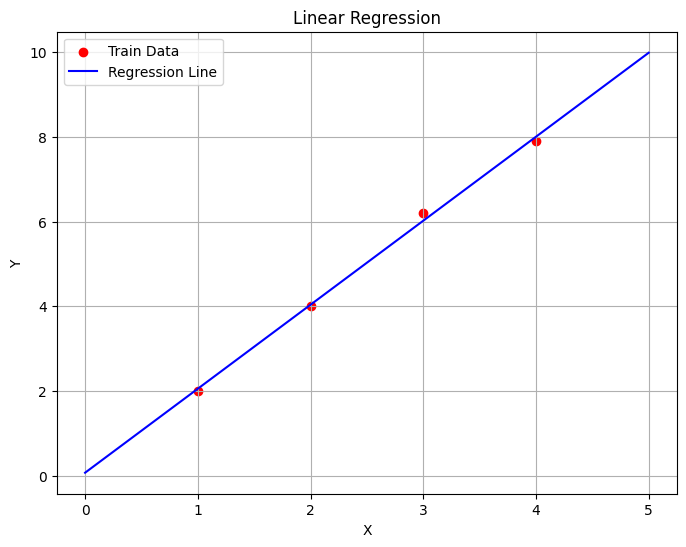

In [28]:
import matplotlib.pyplot as plt
x_line = torch.linspace(0, 5, 100).view(-1, 1)  # x 범위 (0 ~ 5)
y_line = x_line * W.item() + b.item()  # 선형 회귀 결과

# 플롯
plt.figure(figsize=(8, 6))
plt.scatter(x_train.numpy(), y_train.numpy(), color='red', label='Train Data')  # 데이터 점 (동그라미)
plt.plot(x_line.numpy(), y_line.numpy(), color='blue', label='Regression Line')  # 회귀선
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.show()

### Remark
optimizer.zero_grad()가 필요한 이유: 파이토치는 미분을 통해 얻은 기울기를 이전에 계산된 기울기 값에 누적시키는 특징이 있습니다.

예를 들어봅시다.

In [26]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))


수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


계속해서 미분값인 2가 누적. 그래서 optimizer.zero_grad()를 통해 미분값을 계속 0으로 초기화.

## High-level Implementation with `nn.Module`

In [29]:
x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[2], [4], [6.2], [7.9]])

이제 linear regression 모델을 만들면 되는데, 기본적으로 PyTorch의 모든 모델은 제공되는 `nn.Module`을 inherit 해서 구성

In [31]:
class LinearRegressionModel(nn.Module):
    #__init__(): 객체가 갖는 속성값을 초기화하는 역할 -> 객체가 생성될 때 자동으로 호출
    # super()호출 >>>> 오버라이딩,  nn.Module 클래스의 속성들을 가지고 초기화
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # W, b가 각각 차원이 1이라서

    #forward() :모델이 학습데이터를 입력받아서 forward 연산을 진행 -> 객체를 데이터와 함께 호출하면 자동으로 실행
    # forward 연산: H(x)  식에 입력 x로부터 예측된 y를 얻는 것
    def forward(self, x):
        return self.linear(x)

모델의 `__init__`에서는 사용할 레이어들을 정의. 여기서 우리는 linear regression 모델을 만들기 때문에, `nn.Linear` 를 이용. 그리고 `forward`에서는 이 모델이 어떻게 입력값에서 출력값을 계산하는지 나타냄.

In [32]:
#객체 호출하기
model = LinearRegressionModel()
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.4283]], requires_grad=True), Parameter containing:
tensor([-0.9461], requires_grad=True)]


두 값 모두 현재는 랜덤 초기화. 그리고 학습대상이므로 requires_grad=True가 됨.

## Hypothesis

이제 모델을 생성해서 예측값 $H(x)$를 구해보자

In [33]:
hypothesis = model(x_train)

In [34]:
print(hypothesis)

tensor([[-1.3744],
        [-1.8027],
        [-2.2310],
        [-2.6594]], grad_fn=<AddmmBackward0>)


## Cost

이제 mean squared error (MSE) 로 cost를 구해보자. MSE 역시 PyTorch에서 기본적으로 제공한다.

In [35]:
print(hypothesis)
print(y_train)

tensor([[-1.3744],
        [-1.8027],
        [-2.2310],
        [-2.6594]], grad_fn=<AddmmBackward0>)
tensor([[2.0000],
        [4.0000],
        [6.2000],
        [7.9000]])


In [37]:
cost = F.mse_loss(hypothesis, y_train) # import torch.nn.functional as F

In [38]:
print(cost)

tensor(56.9101, grad_fn=<MseLossBackward0>)


## Gradient Descent

마지막 주어진 cost를 이용해 $H(x)$ 의 $W, b$ 를 바꾸어서 cost를 줄인다. 이때 PyTorch의 `torch.optim` 에 있는 `optimizer` 들 중 하나를 사용.

In [39]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [40]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

## Training with Full Code

In [47]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[2], [4], [6.2], [7.9]])
# 모델 초기화
model = LinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 0.739, b: 0.551 Cost: 12.727779
Epoch  100/1000 W: 1.781, b: 0.665 Cost: 0.075363
Epoch  200/1000 W: 1.835, b: 0.506 Cost: 0.046673
Epoch  300/1000 W: 1.875, b: 0.388 Cost: 0.030922
Epoch  400/1000 W: 1.905, b: 0.300 Cost: 0.022275
Epoch  500/1000 W: 1.927, b: 0.235 Cost: 0.017528
Epoch  600/1000 W: 1.943, b: 0.187 Cost: 0.014922
Epoch  700/1000 W: 1.955, b: 0.152 Cost: 0.013491
Epoch  800/1000 W: 1.964, b: 0.125 Cost: 0.012706
Epoch  900/1000 W: 1.971, b: 0.106 Cost: 0.012275
Epoch 1000/1000 W: 1.976, b: 0.091 Cost: 0.012038


점점 $H(x)$ 의 $W$ 와 $b$ 를 조정해서 cost가 줄어드는 것을 볼 수 있다.

W와 b의 값도 최적화가 되었는지 확인. x에 임의의 값 4를 넣어 모델이 예측하는 y의 값을 확인해보자.

In [49]:
# 임의의 입력 2.5를 선언
new_var =  torch.FloatTensor([[2.5]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 2.5라면 y가 5에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 2.5 일 때의 예측값 :", pred_y)

print(list(model.parameters()))

훈련 후 입력이 2.5 일 때의 예측값 : tensor([[5.0312]], grad_fn=<AddmmBackward0>)
[Parameter containing:
tensor([[1.9759]], requires_grad=True), Parameter containing:
tensor([0.0914], requires_grad=True)]


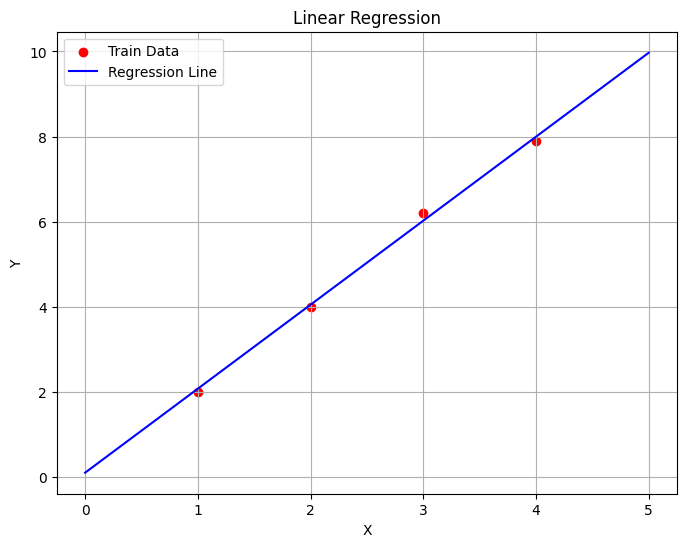

In [50]:
x_line = torch.linspace(0, 5, 100).view(-1, 1)  # x 범위 (0 ~ 5)
y_line = x_line * W + b  # 선형 회귀 결과

# 플롯
plt.figure(figsize=(8, 6))
plt.scatter(x_train.numpy(), y_train.numpy(), color='red', label='Train Data')  # 데이터 점 (동그라미)
plt.plot(x_line.numpy(), y_line.numpy(), color='blue', label='Regression Line')  # 회귀선
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.show()